# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

There are a few good items that we can pull form this report. First, our data set is not small but it is not large enough to really warrant great results, not saying that there is nothing to gain from the analysis. Second it is good to see that the population of mice was relatively equal between the sex of the mouse. Third the high correlation between weight and tumor size gives strong evidence for mice that weigh more to have more tumors over time.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_sets_combine = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")
# Display the data table for preview


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# data_sets_combine = pd.merge(mouse_metadata, study_results)
# data_sets_combine = pd.merge(study_results, mouse_metadata)
data_sets_combine = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")

# Display the data table for preview
data_sets_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(data_sets_combine["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids = data_sets_combine[data_sets_combine.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicated_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicated_data = data_sets_combine[data_sets_combine["Mouse ID"] == "g989"]
mouse_duplicated_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# data_sets_combine["Mouse ID"].isin(mouse_duplicated_data) == False 
data_cleaned = data_sets_combine[data_sets_combine["Mouse ID"].isin(mouse_duplicated_data) == False]
data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(data_cleaned["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = data_cleaned.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = data_cleaned.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = data_cleaned.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_dev = data_cleaned.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = data_cleaned.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

pd.DataFrame({"Mean Tumor Volume":mean,
               "Median Tumor Volume":median,
               "Variance of Tumor Volume":variances,
               "Std. Dev. of Tumor Volume":standard_dev,
               "Std. Err. of Tumor Volume":sems,

              }
             )

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std. Dev. of Tumor Volume,Std. Err. of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summery_stats = data_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var", "std", "sem"]})

## Bar and Pie Charts

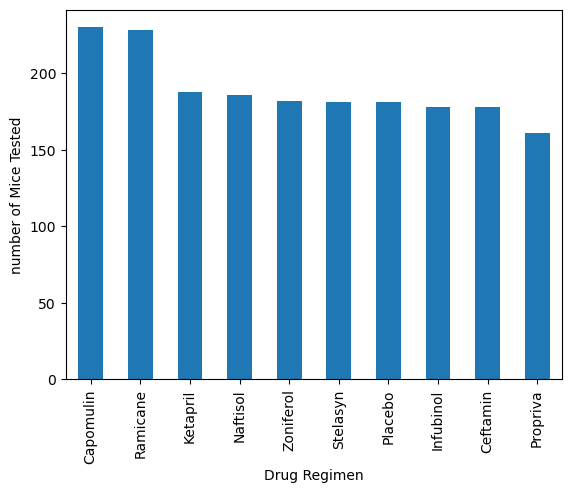

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = data_cleaned["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("number of Mice Tested")

plt.show()


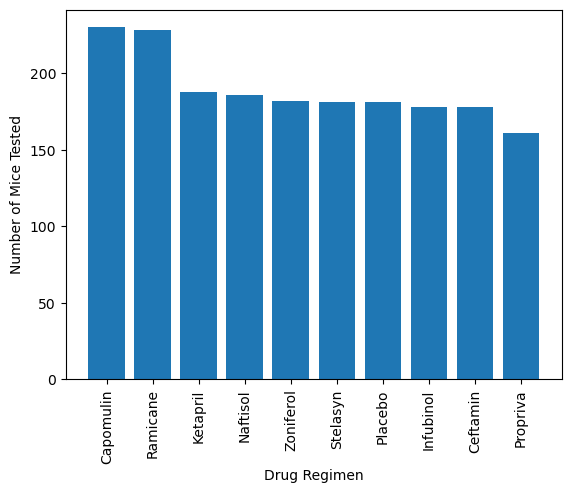

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = data_cleaned["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

plt.show()


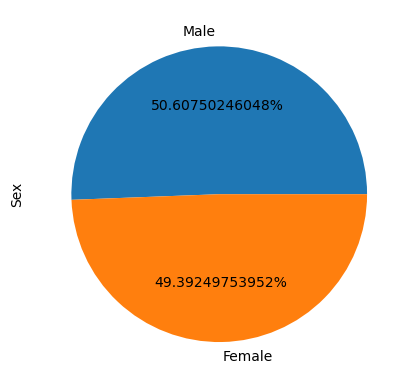

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = data_cleaned.Sex.value_counts()
counts.plot(kind="pie", autopct="%1.11f%%" )
plt.show()

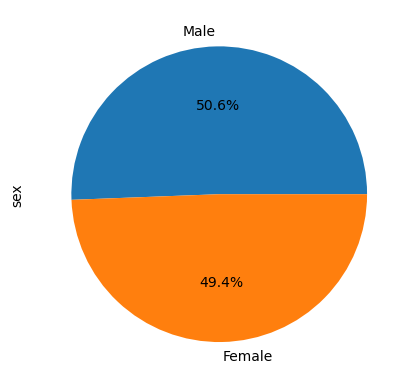

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = data_cleaned.Sex.value_counts()
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor = data_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
merged_data = max_tumor.merge(data_cleaned, on=["Mouse ID", "Timepoint"], how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    fin_tumor = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(fin_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = fin_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = fin_tumor.loc[(fin_tumor < lower_bound) | (fin_tumor > upper_bound)]
    print(f"{drug}'s potential outliers {outliers}")

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


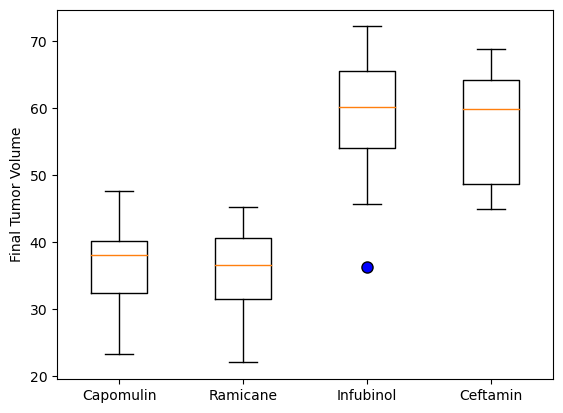

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor="blue", markersize=8)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=orange_out)
plt.ylabel("Final Tumor Volume")
plt.show()


## Line and Scatter Plots

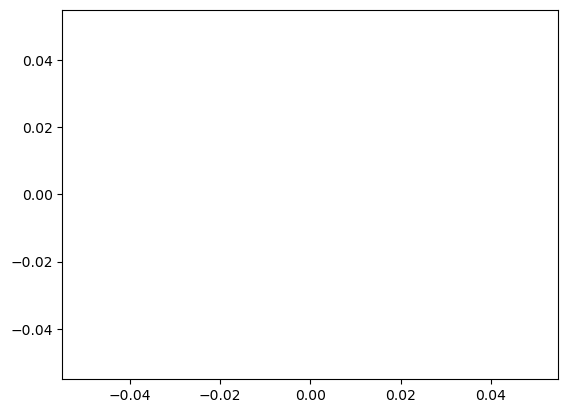

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = data_cleaned[data_cleaned["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table[capomulin_table["Mouse ID"] == "1509"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])

<function matplotlib.pyplot.show(close=None, block=None)>

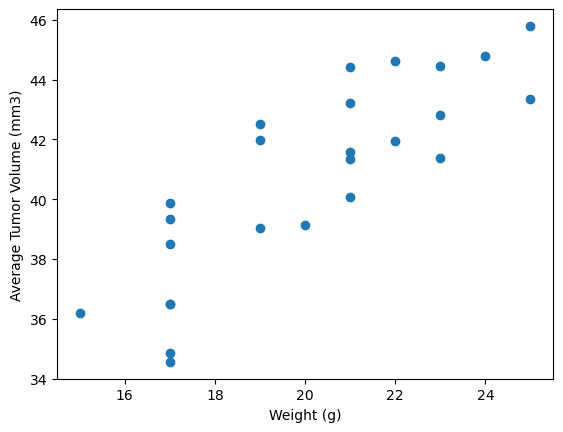

In [20]:
#  Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = data_cleaned[data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_ave = capomulin_table.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is0.84


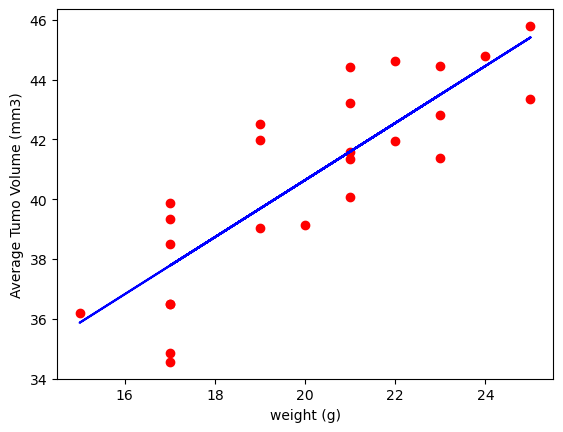

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is{round(corr[0],2)}")
model = st.linregress(capomulin_ave["Weight (g)"], capomulin_ave["Tumor Volume (mm3)"])
y_values = capomulin_ave["Weight (g)"] * model[0] + model[1]
plt.scatter(capomulin_ave["Weight (g)"],capomulin_ave["Tumor Volume (mm3)"], color="red" )
plt.plot(capomulin_ave["Weight (g)"], y_values, color="blue")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumo Volume (mm3)")
plt.show()